In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
print(X)

[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2.88024255e+00  2

C:\Users\DELL\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


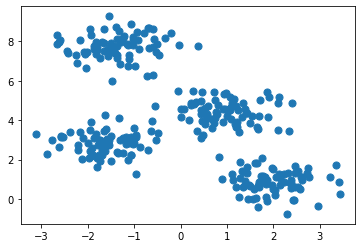

In [3]:
plt.scatter(X[:,0],X[:,1],s=50)

In [4]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_means=kmeans.predict(X)

In [5]:
y_means

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters,rseed=2):
    #1. Randomly choose clusters
    
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    
    centers=X[i]
    
    while True:
        #2a. Assign labels based on closest center
        labels=pairwise_distances_argmin(X,centers)
        
        #2b. Find new centers from means of points
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        #2c Check for convergence
        if np.all(centers == new_centers):
            break
        centers=new_centers
    
    return centers,labels

In [7]:
centers,labels=find_clusters(X,4)

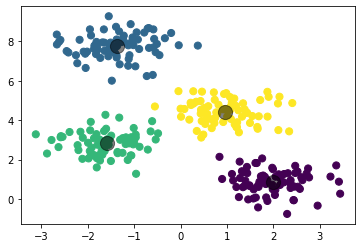

In [8]:
plt.scatter(X[:,0],X[:,1],c=y_means,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)